# Importing Packages

In [2]:
# Import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Cleaning Data

In [3]:
# Read in dataset
project_df = pd.read_csv('1 - Project Data.csv')

In [4]:
# Make a copy of the data
df = project_df.copy()

In [5]:
# Check first 5 rows
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [6]:
# Check for nulls
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [7]:
# Check if 'Churn Label' and 'Churn Value' give the same information - yes
df[['Churn Label', 'Churn Value']].value_counts()

Churn Label  Churn Value
No           0              5174
Yes          1              1869
dtype: int64

In [8]:
# Check lengths of dataset
df.shape

(7043, 31)

In [9]:
# Check for duplicated rows
df.duplicated().sum()

0

In [10]:
# Get number of unique values in each column
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Reason           20
dtype: int64

- Drop 'Count', 'Country', and 'State' as they only have 1 unique value
- Drop 'Churn Reason' as this only has entries for churned customers
- Drop 'Churn Label' as it gives same information as 'Churn Value'
- Drop 'CustomerID' as each customer has a unique ID and is not useful for modelling

In [11]:
# Drop unnecessary columns
df.drop(columns=['CustomerID','Churn Reason', 'Churn Label','Count', 'Country', 'State'], inplace=True)

In [12]:
# Check if 'Lat Long' gives teh same information as 'Latitude' and 'Longitude - yes
for i in range(len(df)):
    fail = 0
    if df['Lat Long'][i] != str(df['Latitude'][i]) + ', ' + str(df['Longitude'][i]):
        print(df.loc[i])
        fail +=1
print(f'There are {fail} mismatched columns')

There are 0 mismatched columns


In [13]:
df[['Zip Code', 'Lat Long']].value_counts()

Zip Code  Lat Long              
90001     33.973616, -118.24902     5
91803     34.074736, -118.145959    5
91917     32.622999, -116.687855    5
91916     32.912664, -116.635387    5
91915     32.605012, -116.97595     5
                                   ..
93705     36.78724, -119.827813     4
93704     36.799648, -119.801247    4
93703     36.768774, -119.762633    4
93702     36.739385, -119.753649    4
96161     39.342498, -120.247127    4
Length: 1652, dtype: int64

In [14]:
# Drop latitude and longitude columns as 'Zip Code' gives the same information
df.drop(columns=['Lat Long', 'Latitude', 'Longitude'], inplace=True)

In [15]:
# Check data type of each column
df.dtypes

City                  object
Zip Code               int64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Value            int64
dtype: object

In [16]:
# Payment method is object, need to change to float
# Some rows have empty spaces
df.loc[df['Total Charges']==' ']

,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
2234,San Bernardino,92408,Female,No,Yes,No,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,Male,No,No,No,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San Mateo,94401,Female,No,Yes,No,0,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,Male,No,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,Female,No,Yes,No,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los Angeles,90029,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun City,92585,Male,No,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben Lomond,95005,Female,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La Verne,91750,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,Female,No,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


Take out empty 'Total Charges' rows as they have not been in the system long enough to provide accurate information towards the model

In [17]:
# Take out rows with empty 'Total Charges'
df = df[df['Total Charges'] != ' ']
df.reset_index(inplace=True, drop=True) # Reset index
df['Total Charges'] = df['Total Charges'].astype(float) # Change column dtype to float

Some columns have overlapping information, we can get rid of redundant data using ohe and mapping

In [18]:
# Check value counts for the following columns
for f in ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies','Internet Service', 'Phone Service', 'Multiple Lines']:
    print(df[f].value_counts())

No                     3497
Yes                    2015
No internet service    1520
Name: Online Security, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: Online Backup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: Device Protection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: Tech Support, dtype: int64
No                     2809
Yes                    2703
No internet service    1520
Name: Streaming TV, dtype: int64
No                     2781
Yes                    2731
No internet service    1520
Name: Streaming Movies, dtype: int64
Fiber optic    3096
DSL            2416
No             1520
Name: Internet Service, dtype: int64
Yes    6352
No      680
Name: Phone Service, dtype: int64
No                  3385
Yes                 2967
No phone service     680
Name: Multiple Lines, dtype: int64


The following columns have 'No internet service' the exact same times (1520):
- Online Security
- Online Backup
- Device Protection
- Tech Support
- Streaming TV
- Streaming Movies
Also, Internet Service has 'No' in 1520 rows as well. Let's check if these occur in the same rows concurrently:

In [19]:
# Make a new dataframe where 'Online Security' == 'No internet service'
new_df = df.loc[df['Online Security'] == 'No internet service']
len(new_df)

1520

In [20]:
# Check unique values for the rest of the other 'internet' columns to see if they are also the same
columns = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Internet Service']
for c in columns:
    print(new_df[c].unique())


['No internet service']
['No internet service']
['No internet service']
['No internet service']
['No internet service']
['No internet service']
['No']


Feature engineering 'internet' columns:
- We will have a 'No_internet_service' column that has value 1 whenever an entry has no internet service and 0 for the rest
- For the rest of the columns it will have 1 for 'Yes'. 0 for 'No' and 'No internet service'

The columns 'Phone Service' and 'Multiple Lines' have 680 rows with values as 'No' and 'No phone service' respectively
Let's check if these occur concurrently:

In [21]:
# Get dataframe of 'Phone Service' == 'No
new_df2 = df.loc[df['Phone Service'] == 'No']
len(new_df2)

680

In [22]:
new_df2['Multiple Lines'].unique()

array(['No phone service'], dtype=object)

Feature engineering 'phone' columns:
- 'Phone Service' : 1 for 'Yes. 0 for 'No'.
- 'Multiple lines': 1 for 'Yes'. 0 for 'No' and 'No phone service'.

# EDA

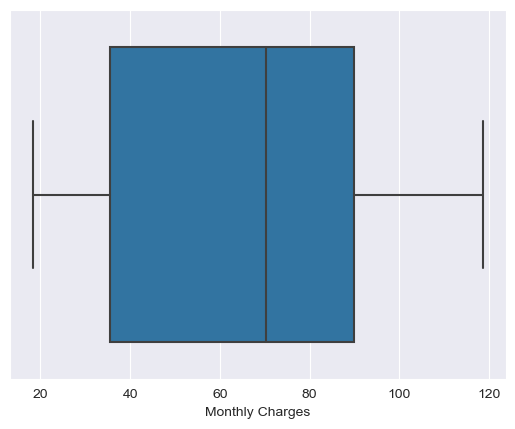

In [23]:
sns.boxplot(df,
            x = 'Monthly Charges',
            orient='h')
plt.show()

Despite a high churn rate, monthly charges around exceeding 70 are common.

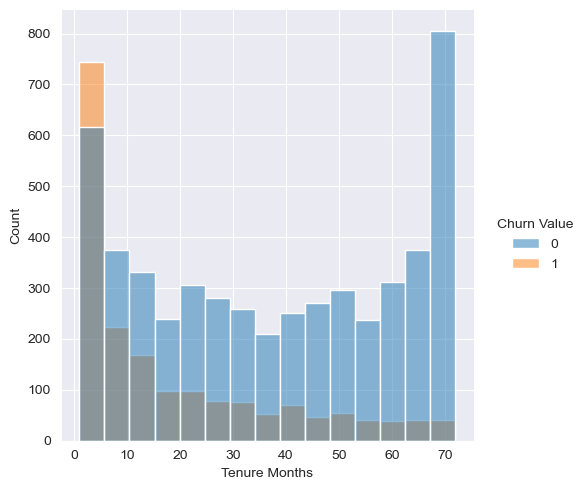

In [24]:
sns.displot(data = df,
            x = 'Tenure Months',
            hue = 'Churn Value')
plt.show()

Very clear relationship between tenure duration and churn value.
Customers that have been with the firm for longer are less likely to churn.
Customers with a tenure below 5 months are likely to churn.

In [25]:
#Sort tenure into groups
def group_cust(x):
    if 0 <= x <= 6:
        return 'New'
    elif 7 <= x <= 12:
        return 'Short Term'
    elif 13 <= x <= 24:
        return 'Medium Term'
    elif 25 <= x <= 60:
        return 'Long Term'
    else:
        return 'Loyal'
df_eda = df.copy()
df_eda['Tenure Months'] = df['Tenure Months'].apply(group_cust)

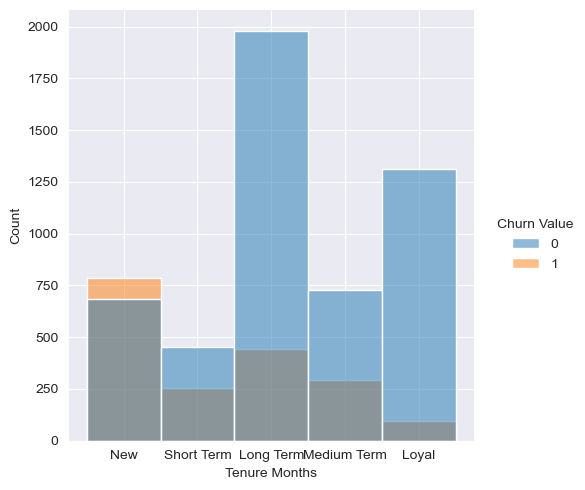

In [26]:
sns.displot(data = df_eda,
            x = 'Tenure Months',
            hue = 'Churn Value')
plt.show()

Classification of customers by Tenure Months serves to highlight the relationship between tenure and churn intent.
"Loyal" customers, who have been with the company for over 5 years, are very unlikely to churn by comparison.
It may be worthwhile to focus on retaining recent customers.

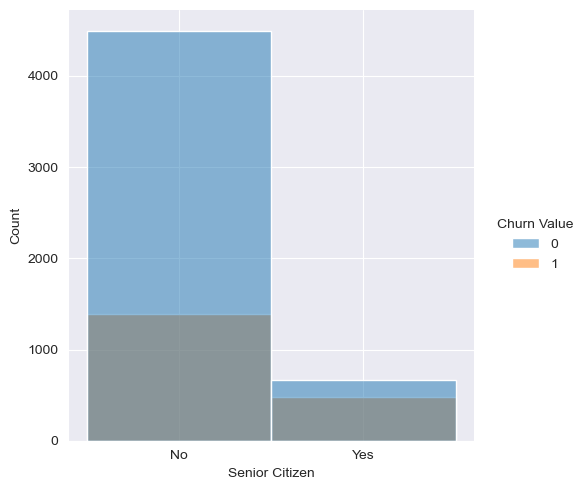

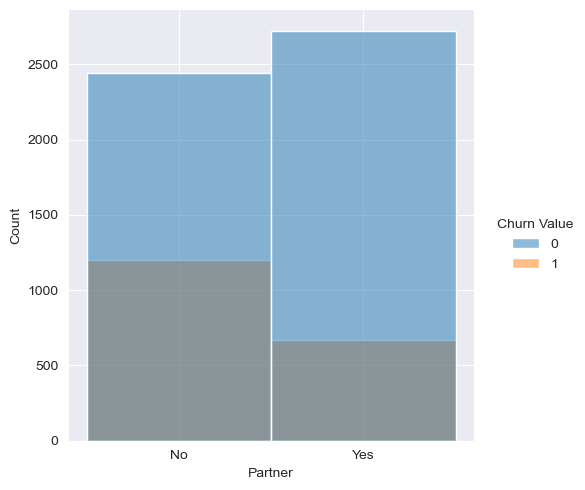

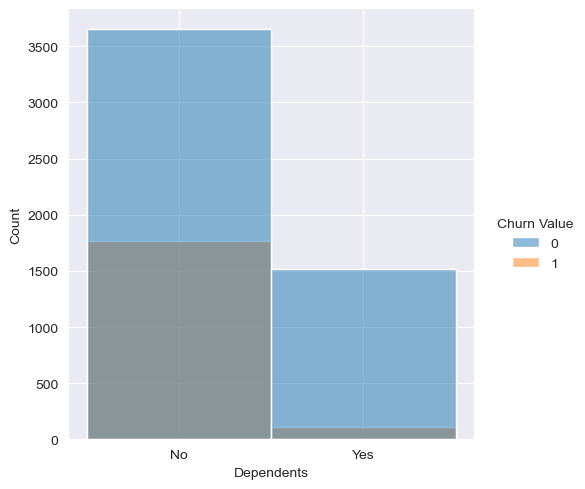

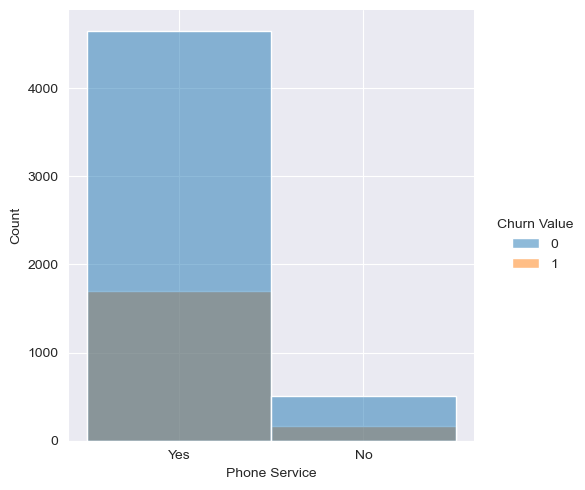

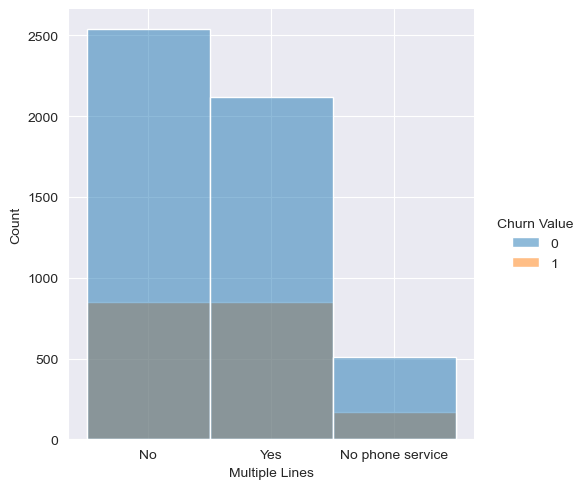

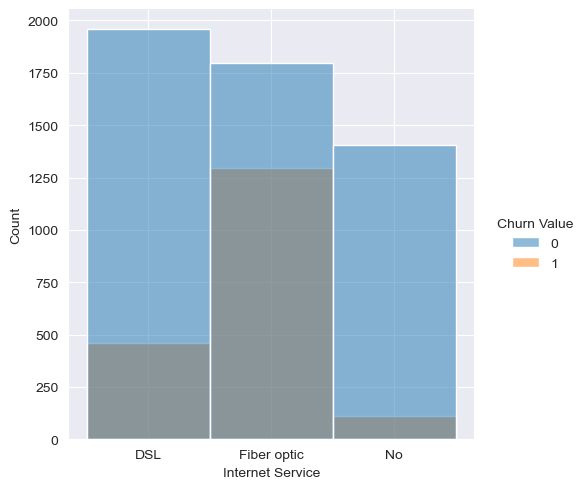

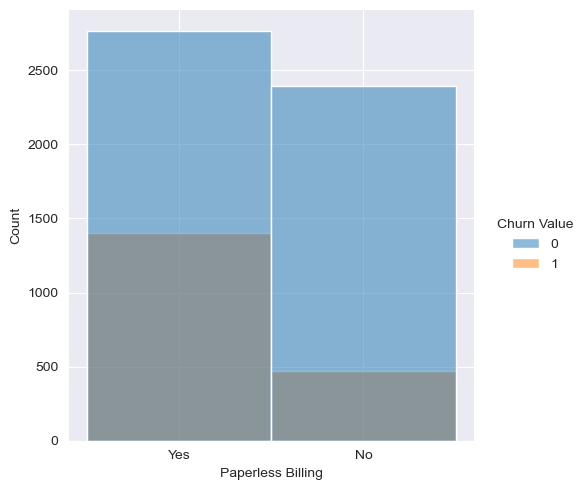

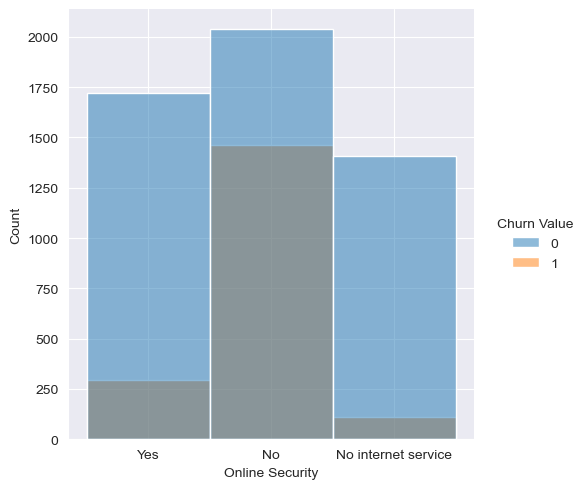

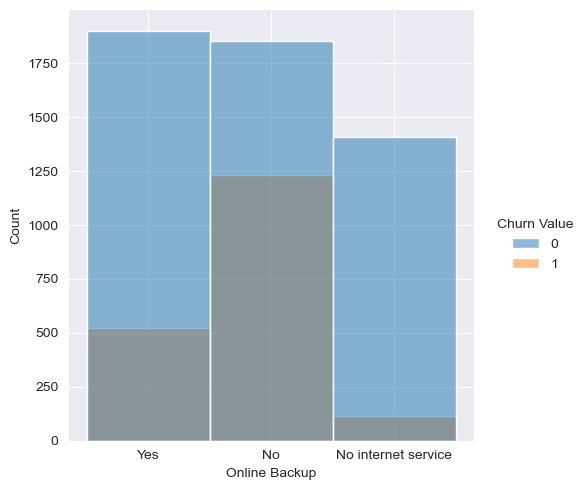

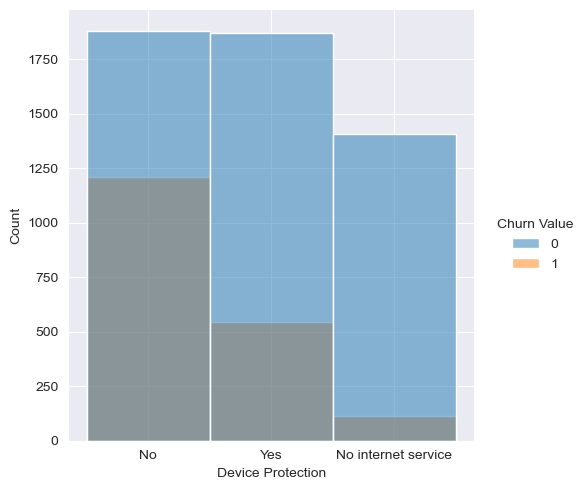

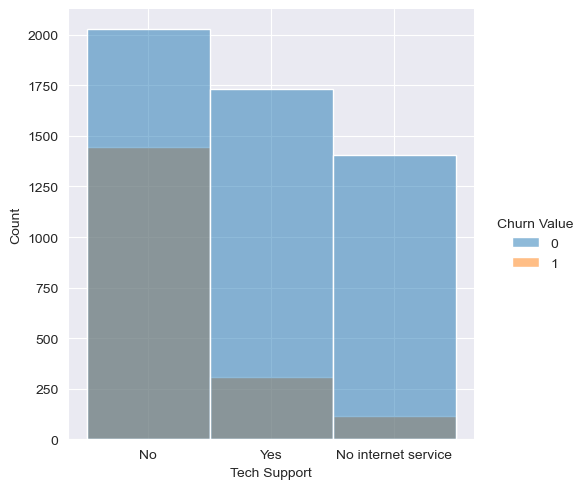

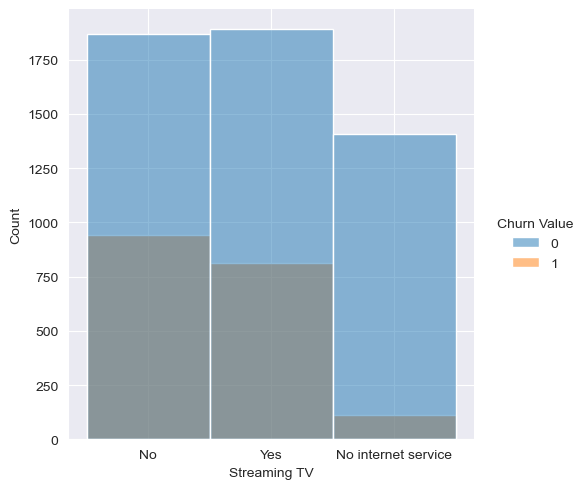

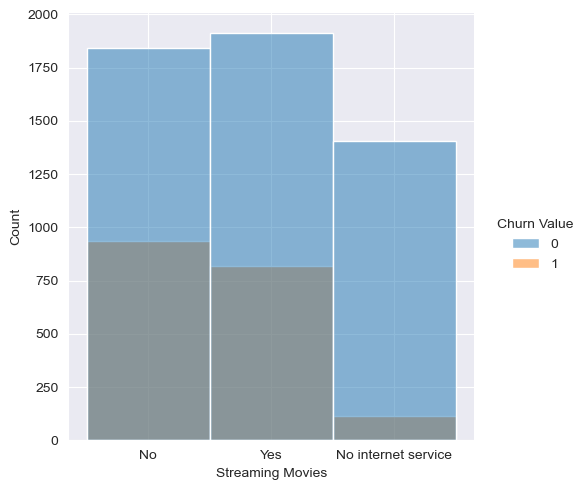

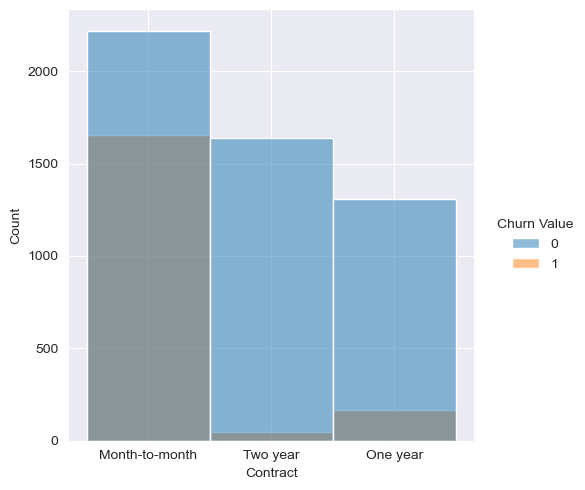

In [27]:
cols = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Paperless Billing','Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract']
#Plot churn outcome against categorical data
for c in cols:
    sns.displot(data = df,
                x= c,
                hue = 'Churn Value')
    plt.show()

Some patterns emerge from a breakdown of individual features by churn rate. This is explored in more depth later.

In [28]:
#Get a correlation matrix for heatmap
cr = df.corr(numeric_only=True)

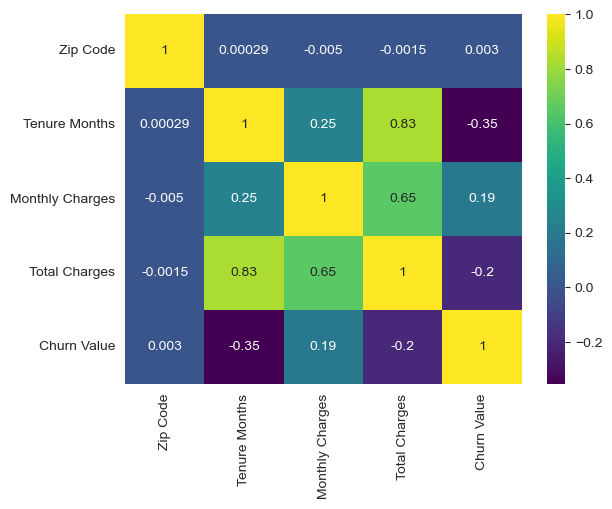

In [29]:
sns.heatmap(cr,
            annot = True,
            cmap = 'viridis')
plt.show()

Zip code is not correlated with the other features in an identifiable way.
A more indepth analysis of regional trends would be more appropriate if there is a link between churn rate and client location. This is beyond the scope of our analysis.

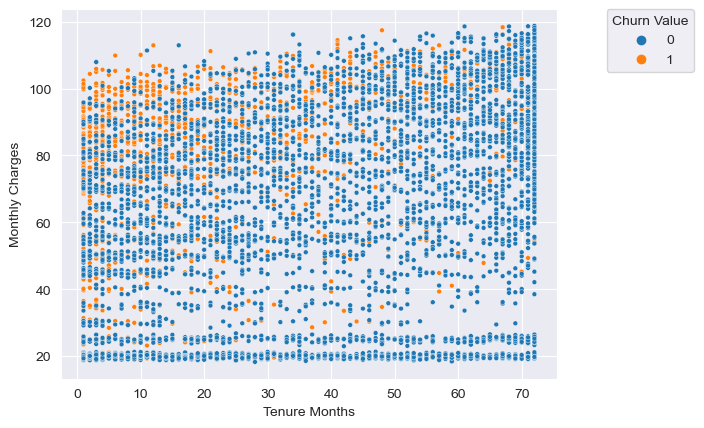

In [30]:
sns.scatterplot(data = df,
                y = 'Monthly Charges',
                x = 'Tenure Months',
                s = 12,
                hue = 'Churn Value',
                markers=["o", "s"]
                )
plt.legend(title = 'Churn Value', bbox_to_anchor=(1.1, 1), borderaxespad=0)
plt.show()

As expected, there is an emerging pattern between the churn rate and monthly charges, as well as tenure. Clients with shorter tenures and increased charges are much more likely to turn, whereas clients that have been with the company for a longer period of time are unlikely to churn, even when paying the higher prices.

In [31]:
#Define subset of df_eda for churned clients
churned = df_eda['Churn Value'] == 1

print('The churn rates for each feature are below, broken down by churn value.')
for c in cols:                                                                                              #Loop through each column
    print(f'The following are percentage breakdowns for '
          f'{c} with values {df_eda[churned][c].value_counts().index.tolist()} '                            #Display column name and possible categories
          f'respectively:')
    for i in range(len(df_eda[churned][c].value_counts())):                                                 #Loop through each category
        print(f'{np.round(100*df_eda[c].value_counts()[i]/len(df_eda), 2)}%')                               #Print the % make-up of each category
    print('Compare these with the percentages of churned customers for each category as above:')
    for i in range(len(df_eda[churned][c].value_counts())):                                                 #Loop through each category once more
        print(f'{np.round(100*df_eda[churned][c].value_counts()[i]/len(df_eda[churned]), 2)}%')             #Print the % make-up for churned clients only
    print('----------------------------------------------------------------------------')

The churn rates for each feature are below, broken down by churn value.
The following are percentage breakdowns for Senior Citizen with values ['No', 'Yes'] respectively:
83.76%
16.24%
Compare these with the percentages of churned customers for each category as above:
74.53%
25.47%
----------------------------------------------------------------------------
The following are percentage breakdowns for Partner with values ['No', 'Yes'] respectively:
51.75%
48.25%
Compare these with the percentages of churned customers for each category as above:
64.21%
35.79%
----------------------------------------------------------------------------
The following are percentage breakdowns for Dependents with values ['No', 'Yes'] respectively:
76.96%
23.04%
Compare these with the percentages of churned customers for each category as above:
94.33%
5.67%
----------------------------------------------------------------------------
The following are percentage breakdowns for Phone Service with values ['Yes'

The first set of percentages in each case is the breakdown of the characteristic across the population. The second set is the same breakdown across only the churned population. From these results, we conclude that the following make a customer more likely to churn:
- No partner
- No dependant
- Uses paperless billing
- Has a month-to-month contract. Clients on a two year contract very rarely churn.
- Does **not** have one or more of:
    - Online security
    - Online backup
    - Device protection
    - Tech Support
    - Streaming TV
    - Streaming movies

In general, clients with no internet service are significantly less likely to churn.

# Feature Engineering

In [32]:
# Function to categorize 'Tenure Months'
def group_tenure_months(x):
    if 0 <= x <= 6:
        return 'New'
    elif 7 <= x <= 12:
        return 'Short Term'
    elif 13 <= x <= 24:
        return 'Medium Term'
    elif 25 <= x <= 60:
        return 'Long Term'
    else:
        return 'Loyal'

In [33]:
def lr_feature_eng(dataframe):
    # Create copy of dataframe
    df_copy = dataframe.copy()

    ''' Sorting Out Categorical Variables '''
    # List of columns with yes/no/no internet service values
    yes_no_columns = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing','Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Multiple Lines']
    dictionary = {'No': 0, 'Yes': 1, 'No internet service':0,'No phone service':0} # Dictionary for mapping yes/no/no internet service values to numbers
    dictionary2 = {'No':0, 'Yes':0, 'No internet service':1} # Dictionary to map 'No_Internet_Service' column - 1 everytime there is no internet service
    dictionary3 = {'Fiber optic': 0, 'DSL': 1, 'No': 0} # Dictionary to map 'Internet_Service' column

    df_copy['No_Internet_Service'] = df_copy[columns[0]].map(dictionary2) # Map 'No_Internet_service' column based on dictionary2 and 'Online Security' column

    # Loop through yes_no_columns list and map based on dictionary
    for c in yes_no_columns:
        df_copy[c] = df_copy[c].map(dictionary)
    df_copy['Internet Service'] = df_copy['Internet Service'].map(dictionary3) # Map 'Internet Service' based on dictionary 3
    df_copy['Tenure Months'] = df_copy['Tenure Months'].apply(group_tenure_months) # Apply function group_tenure_months() to categorize 'Tenure Months'

    ''' One Hot Encoding '''
    ohe_list = ['Gender', 'Tenure Months', 'Contract', 'Payment Method'] # List of columns to ohe
    df_copy = pd.get_dummies(df_copy, columns = ohe_list, drop_first = True) # ohe

    ''' Dropping Columns'''
    df_copy.drop(columns=['City','Zip Code'], inplace=True) # Drop 'City' and 'Zip Code' as they will not be accurately modeled by logistic regression

    ''' MinMax Scaling'''
    minmax = MinMaxScaler() # Initialise scaler
    df_copy[['Total Charges', 'Monthly Charges']] = minmax.fit_transform(df_copy[['Total Charges', 'Monthly Charges']]) # MinMax scale 'Total Charges' and 'Monthly Charges'

    ''' Add Constant '''
    df_copy = sm.add_constant(df_copy)
    return df_copy

In [34]:
# Function for plotting confusion matrix
def conf_matrix(matrix):
    ax = plt.subplot()
    sns.heatmap(matrix, annot = True, ax = ax, fmt = 'g');
    ax.xaxis.set_ticklabels(['predicted negative', 'predicted positive'])
    ax.yaxis.set_ticklabels(['actual negative', 'actual positive']);

In [35]:
# Function for getting scores of model
def apr(y_pred, y_real):
    """ Calculates accuracy, precision, recall
        Requires predicted value first, and then the real value
    """
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1: {f1}")
    return accuracy, precision, recall, f1

In [36]:
# Defining variables and target
X = df.drop(columns = 'Churn Value')
y = df['Churn Value']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Logistic Regression

In [37]:
# Check class balance
df['Churn Value'].value_counts()

0    5163
1    1869
Name: Churn Value, dtype: int64

Shows imbalanced classes, so let's try finding the best class weights to put into our logistic regression model:

In [38]:
X_train_fe = lr_feature_eng(X_train) # Feature engineer X_train
X_test_fe = lr_feature_eng(X_test) # Feature engineer X_test
lr = LogisticRegression(solver='newton-cg') # Get LogisticRegression function
weights = np.linspace(0.0,0.99,100) # Set the range for class weights
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]} # Create dictionary for GridSearch

# Fit GridSearch to train data with 5 folds
gridsearch = GridSearchCV(estimator= lr,
                          param_grid= param_grid,
                          cv=StratifiedKFold(),
                          n_jobs=-1,
                          scoring='f1',
                          verbose=2).fit(X_train_fe, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


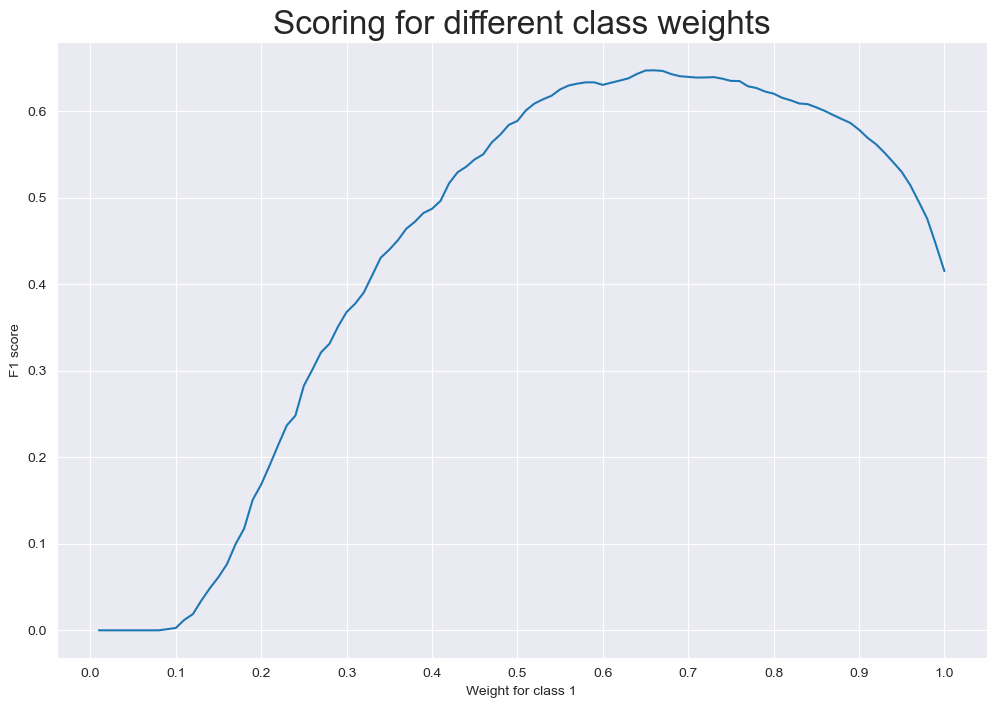

In [39]:
#Ploting the F1 score for different values of weight
plt.figure(figsize=(12,8)) # Set plot size
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data, x = 'weight', y = 'score') # Create lineplot
plt.xlabel('Weight for class 1') # Set x-axis label
plt.ylabel('F1 score') # Set y-axis label
plt.xticks([round(i/10,1) for i in range(0,11,1)]) # Set x-ticks
plt.title('Scoring for different class weights', fontsize=24) # Set title
plt.show() # Show plot

In [40]:
# Sort from highest to lowest score
weigh_data.sort_values('score',ascending=False)

,score,weight
34,0.647405,0.66
35,0.647164,0.65
33,0.646711,0.67
36,0.643159,0.64
32,0.643122,0.68
...,...,...
95,0.000000,0.05
96,0.000000,0.04
97,0.000000,0.03
98,0.000000,0.02


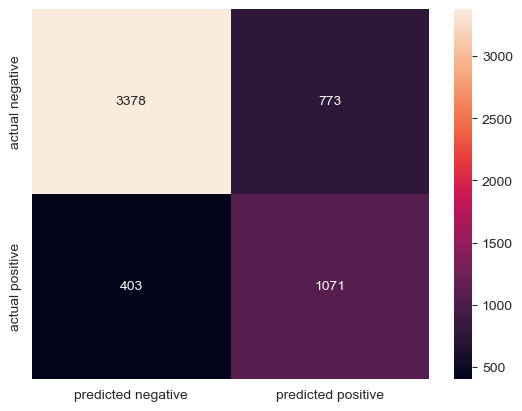

In [41]:
# Create model with best weight classes: 0.35 for class 0 and 0.65 for class 1
w = {0:0.35, 1:0.65} # Set weight
log_reg2 = LogisticRegression(max_iter = 300,random_state=13, class_weight=w) # Get model with set weights
log_reg2.fit(X_train_fe, y_train) # Fit onto training set
X_train_fe[['prob_neg', 'prob_pos']] = log_reg2.predict_proba(X_train_fe) # Predict probabilities
X_train_fe['y_pred'] = np.where(X_train_fe['prob_pos']>.5, 1, 0) # Get predictions with threshold 0.5
cm = metrics.confusion_matrix(y_train, X_train_fe['y_pred']) # Create confusion matrix
conf_matrix(cm) # Plot confusion matrix

In [42]:
print('Train set:')
apr(X_train_fe.y_pred,y_train)

Train set:
Accuracy: 0.7909333333333334
Precision: 0.5808026030368764
Recall: 0.7265943012211669
F1: 0.6455696202531644


(0.7909333333333334,
 0.5808026030368764,
 0.7265943012211669,
 0.6455696202531644)

In [43]:
y_test_pred = log_reg2.predict(X_test_fe)
print('Test set:')
apr(y_test_pred, y_test)

Test set:
Accuracy: 0.7903340440653873
Precision: 0.6082251082251082
Recall: 0.7113924050632912
F1: 0.6557759626604435


(0.7903340440653873,
 0.6082251082251082,
 0.7113924050632912,
 0.6557759626604435)

## Undersampling
The scores achieved from using the optimal weight classes were not great, especially F1 score, so we will try undersampling class 0 to balance the classes out:

In [44]:
df_0 = df.loc[df['Churn Value']==0] # Create dataset with only class 0
df_1 = df.loc[df['Churn Value']==1] # Create dataset with only class 1

In [45]:
# Sample randomly from df_0, getting same number of rows as df_1
df_0 = df_0.sample(n=df_1.shape[0])

In [46]:
df_balanced = pd.concat([df_0,df_1]) # Combine the datasets

In [47]:
df_balanced.shape # Check the shape

(3738, 22)

In [48]:
df_balanced['Churn Value'].value_counts() # Check balance

0    1869
1    1869
Name: Churn Value, dtype: int64

In [49]:
df_balanced.reset_index(inplace=True, drop=True) # Reset index

In [50]:
df_balanced.head() # Check first 5 rows

,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Tehachapi,93561,Female,No,Yes,Yes,29,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.10,692.55,0
1,Novato,94949,Female,No,Yes,No,56,Yes,Yes,Fiber optic,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),85.60,4902.80,0
2,Bonita,91902,Female,No,Yes,Yes,70,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),20.15,1411.20,0
3,Los Angeles,90035,Female,No,Yes,Yes,55,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.30,1079.05,0
4,Camarillo,93012,Male,Yes,Yes,No,52,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),104.45,5481.25,0


In [51]:
# Define features and target, train/test split, and feature engineering
X_b = df_balanced.drop(columns = 'Churn Value')
y_b = df_balanced['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size = 0.2, random_state = 42)
X_train_fe = lr_feature_eng(X_train)
X_test_fe = lr_feature_eng(X_test)

### Dropping columns by VIF

In [52]:
def calculate_vif(X, thresh = 5.0):
    variables = list(range(X.shape[1])) # List of number of rows
    dropped = True
    while dropped:
        dropped = False
        # List comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif)) # Get the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # Delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # If we deleted anything, we set the 'dropped' value to True to stay in the while loop

            print('Remaining variables:')
            print(X.columns[variables]) # Finally, print the variables that are still in our set
    return X.iloc[:, variables] # Return our X cut down to the remaining variables

In [53]:
X_train_fe_vif = calculate_vif(X_train_fe[X_train_fe.columns]) # Use columns after being dropped

dropping 'const' at index: 0
Remaining variables:
Index(['Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'No_Internet_Service', 'Gender_Male',
       'Tenure Months_Loyal', 'Tenure Months_Medium Term', 'Tenure Months_New',
       'Tenure Months_Short Term', 'Contract_One year', 'Contract_Two year',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')
dropping 'Monthly Charges' at index: 13
Remaining variables:
Index(['Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Paperless Bill

### Dropping columns by p-value

In [54]:
# Define function that drops columns by their p-value in a stepwise manner
def stepwise_selection(X, y, threshold_in = 0.01, threshold_out = 0.05, verbose = True):
    # The function is checking for p-values (whether features are statistically significant) - lower is better

    included = [] # This is going to be the list of features we keep

    while True:
        changed = False
        ''' Forward step '''
        excluded = list(set(X.columns) - set(included)) # Get list of excluded columns
        new_pval = pd.Series(index = excluded, dtype = 'float64') # Create empty series
        for new_column in excluded: # Iterate through each excluded column
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit() # Fit model using included columns and new_column
            new_pval[new_column] = model.pvalues[new_column] # Put p-value of each column into series
        best_pval = new_pval.min() # Get the best p-value
        # Add the feature with the lowest (best) p-value under the threshold to our 'included' list
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin() # 'Lowest' p-value
            included.append(best_feature) # Append feature to 'included' list
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval)) # Specifying the verbose text


        ''' Backward step: removing features if new features added to the list make them statistically insignificant '''
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit() # Fit model using all included columns
        # Use all coefs except intercept
        pvalues = model.pvalues.iloc[1:] # Get all p-values
        worst_pval = pvalues.max() # Null if pvalues is empty
        # If the p-value exceeds the upper threshold, the feature will be dropped from the 'included' list
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval)) # Specifying the verbose text
        if not changed:
            break
    return included

In [55]:
# Perform function and get the final columns
final_columns = stepwise_selection(X_train_fe_vif[list(X_train_fe_vif.columns)], y_train)
print('resulting features:')
print(final_columns)

Add  Contract_Two year              with p-value 7.65991e-111
Add  Contract_One year              with p-value 9.82671e-86
Add  Dependents                     with p-value 1.4872e-45
Add  Payment Method_Electronic check with p-value 3.98205e-25
Add  Tenure Months_New              with p-value 4.70883e-17
Add  No_Internet_Service            with p-value 6.66131e-14
Add  Internet Service               with p-value 6.87794e-24
Add  Tech Support                   with p-value 2.00443e-06
Add  Tenure Months_Loyal            with p-value 0.000221036
Add  Streaming Movies               with p-value 0.00123895
Add  Tenure Months_Short Term       with p-value 0.00284185
Add  Partner                        with p-value 0.00382989
Add  Online Security                with p-value 0.00598484
resulting features:
['Contract_Two year', 'Contract_One year', 'Dependents', 'Payment Method_Electronic check', 'Tenure Months_New', 'No_Internet_Service', 'Internet Service', 'Tech Support', 'Tenure Months_Loy

In [56]:
# Create new dataframe containing only the final columns
X_train_fe_final = X_train_fe_vif[final_columns]

Optimization terminated successfully.
         Current function value: 0.457087
         Iterations 7


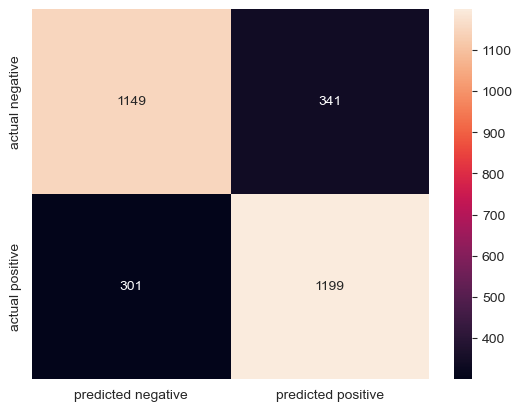

In [57]:
# Fit final columns onto LogisticRegression model and make predictions
log_reg_final = sm.Logit(y_train, X_train_fe_final).fit()
df_predictions_final = pd.DataFrame() # Create empty dataframe to store predictions
df_predictions_final['y_prob'] = log_reg_final.predict(X_train_fe_final) # Get probabilities
df_predictions_final['y_pred'] = np.where(df_predictions_final['y_prob']>.5, 1, 0) # Make predictions

# Create confusion matrix
cm = metrics.confusion_matrix(y_train, df_predictions_final['y_pred'])
conf_matrix(cm) # Plot confusion matrix

In [58]:
print('Train set:')
apr(df_predictions_final.y_pred, y_train)

Train set:
Accuracy: 0.7852842809364549
Precision: 0.7785714285714286
Recall: 0.7993333333333333
F1: 0.7888157894736842


(0.7852842809364549,
 0.7785714285714286,
 0.7993333333333333,
 0.7888157894736842)

In [59]:
test = pd.DataFrame() # Create empty dataframe to store predictions
test['y_prob'] = log_reg_final.predict(X_test_fe[final_columns]) # Get probabilities
test['y_pred'] = np.where(test['y_prob']>.5, 1, 0) # Make predictions
print('Test set:')
apr(test.y_pred, y_test)

Test set:
Accuracy: 0.7820855614973262
Precision: 0.7696335078534031
Recall: 0.7967479674796748
F1: 0.7829560585885486


(0.7820855614973262,
 0.7696335078534031,
 0.7967479674796748,
 0.7829560585885486)

# Decision Trees

In [60]:
def dt_feature_eng(dataframe):
    # Create copy of dataframe
    df_copy = dataframe.copy()

    # List of columns with yes/no/no internet service values
    yes_no_columns = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing','Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Multiple Lines']
    dictionary = {'No': 0, 'Yes': 1, 'No internet service':0,'No phone service':0, 0:0, 1:1,} # Dictionary for mapping yes/no/no internet service values to numbers
    dictionary2 = {'No':0, 'Yes':0, 'No internet service':1} # Dictionary to map 'No_Internet_Service' column - 1 everytime there is no internet service
    dictionary3 = {'Fiber optic': 0, 'DSL': 1, 'No': 0,  0:0, 1:1} # Dictionary to map 'Internet_Service' column

    for c in yes_no_columns:
        df_copy[c] = df_copy[c].map(dictionary)
    df_copy['Internet Service'] = df_copy['Internet Service'].map(dictionary3)

    df_copy['Tenure Months'] = df_copy['Tenure Months'].apply(group_tenure_months)

    ''' one hot encoding '''
    ohe_list = ['Gender', 'Tenure Months', 'Contract', 'Payment Method']
    df_copy = pd.get_dummies(df_copy, columns = ohe_list, drop_first = True)
    return df_copy

In [61]:
df_copy = dt_feature_eng(df_balanced) ##New Dataframe after feature engineering

In [62]:
df_copy.dtypes

City                                       object
Zip Code                                    int64
Senior Citizen                              int64
Partner                                     int64
Dependents                                  int64
Phone Service                               int64
Multiple Lines                              int64
Internet Service                            int64
Online Security                             int64
Online Backup                               int64
Device Protection                           int64
Tech Support                                int64
Streaming TV                                int64
Streaming Movies                            int64
Paperless Billing                           int64
Monthly Charges                           float64
Total Charges                             float64
Churn Value                                 int64
Gender_Male                                 uint8
Tenure Months_Loyal                         uint8


In [63]:
df_copy.head() ##Confirmation that changes have been made

,City,Zip Code,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Gender_Male,Tenure Months_Loyal,Tenure Months_Medium Term,Tenure Months_New,Tenure Months_Short Term,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,Tehachapi,93561,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,Novato,94949,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bonita,91902,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,Los Angeles,90035,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,Camarillo,93012,1,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [64]:
df_copy.reset_index(inplace=True, drop=True)

In [65]:
df_copy.head()

,City,Zip Code,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Gender_Male,Tenure Months_Loyal,Tenure Months_Medium Term,Tenure Months_New,Tenure Months_Short Term,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,Tehachapi,93561,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,Novato,94949,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bonita,91902,0,1,1,1,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,Los Angeles,90035,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,Camarillo,93012,1,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [66]:
df_copy.columns

Index(['City', 'Zip Code', 'Senior Citizen', 'Partner', 'Dependents',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Paperless Billing',
       'Monthly Charges', 'Total Charges', 'Churn Value', 'Gender_Male',
       'Tenure Months_Loyal', 'Tenure Months_Medium Term', 'Tenure Months_New',
       'Tenure Months_Short Term', 'Contract_One year', 'Contract_Two year',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

In [67]:
##Selecting all features that are relevant to predicting the target

feature_cols = ['Zip Code', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
                'Multiple Lines', 'Internet Service', 'Online Security',
                'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
                'Streaming Movies', 'Paperless Billing', 'Monthly Charges',
                'Total Charges', 'Gender_Male', 'Tenure Months_Loyal',
                'Tenure Months_Medium Term', 'Tenure Months_New',
                'Tenure Months_Short Term', 'Contract_One year', 'Contract_Two year',
                'Payment Method_Credit card (automatic)',
                'Payment Method_Electronic check', 'Payment Method_Mailed check']

##Using Train/Test/Split for the Decision Tree model using a training size of 70% which will be tested on the remaining 30%

X_train, X_test, y_train, y_test = train_test_split(df_copy[feature_cols], df_copy['Churn Value'], test_size = 0.3, random_state = 42)

In [68]:
X_train.head()

,Zip Code,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,...,Gender_Male,Tenure Months_Loyal,Tenure Months_Medium Term,Tenure Months_New,Tenure Months_Short Term,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
2148,94965,0,1,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
887,93545,1,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2662,95651,0,1,0,1,1,0,0,1,1,...,1,1,0,0,0,0,1,1,0,0
685,90640,1,1,0,1,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
413,93505,0,1,0,1,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0


In [69]:
X_test.head()

,Zip Code,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,...,Gender_Male,Tenure Months_Loyal,Tenure Months_Medium Term,Tenure Months_New,Tenure Months_Short Term,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
1151,92626,0,1,1,1,1,0,1,1,1,...,0,1,0,0,0,0,1,0,0,0
538,92657,0,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
351,91786,0,0,0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1108,94571,1,0,0,1,0,1,1,1,0,...,0,0,0,1,0,0,0,1,0,0
1662,92111,0,1,0,1,1,0,1,1,1,...,1,1,0,0,0,0,1,0,1,0


In [70]:
#Sanity check to make sure it is balanced
sum(X_train.index == y_train.index)==len(y_train)


True

In [71]:
##Making sure all data types are suitable to be run into the Decision Tree

X_train.dtypes

Zip Code                                    int64
Senior Citizen                              int64
Partner                                     int64
Dependents                                  int64
Phone Service                               int64
Multiple Lines                              int64
Internet Service                            int64
Online Security                             int64
Online Backup                               int64
Device Protection                           int64
Tech Support                                int64
Streaming TV                                int64
Streaming Movies                            int64
Paperless Billing                           int64
Monthly Charges                           float64
Total Charges                             float64
Gender_Male                                 uint8
Tenure Months_Loyal                         uint8
Tenure Months_Medium Term                   uint8
Tenure Months_New                           uint8


In [72]:
##Creation of initial Decision Tree that has a maximum depth of 3 levels on training data

treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [73]:
##Provides the classes that the model will choose

treeclf.classes_

array([0, 1], dtype=int64)

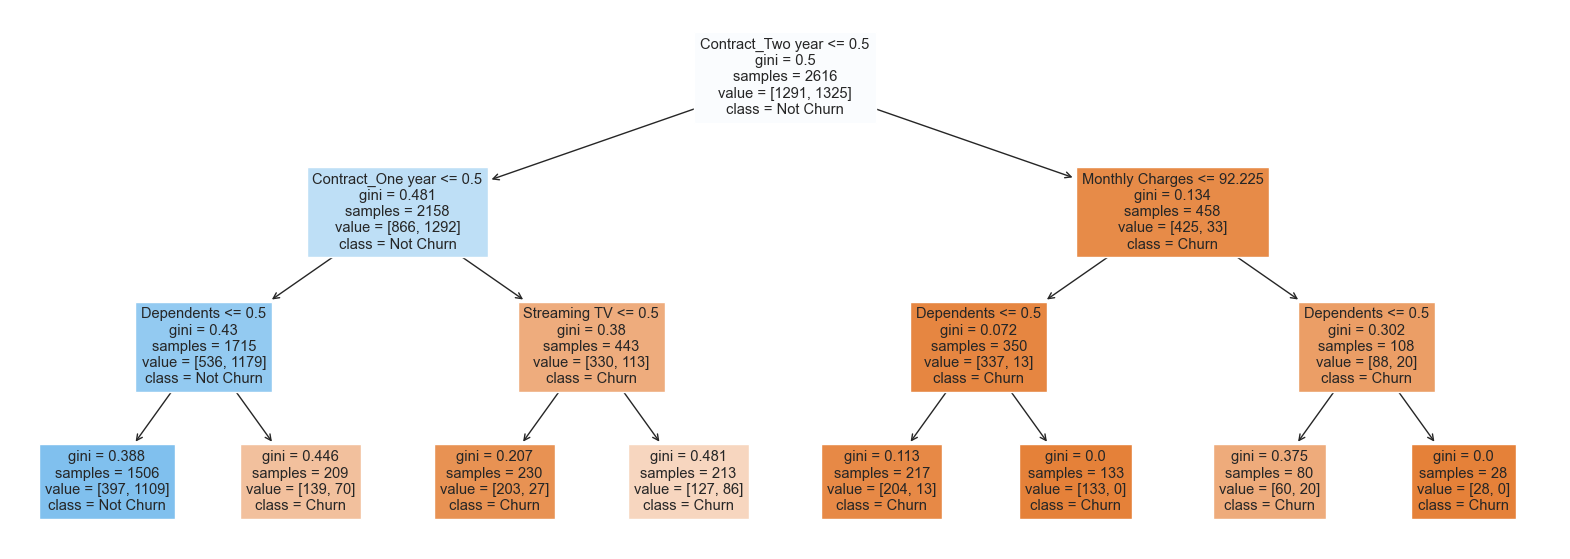

In [74]:
##Visualation of Decision Tree

fig = plt.figure(figsize=(20,7))
thing = tree.plot_tree(treeclf,
                       feature_names=feature_cols,
                       class_names=['Churn', 'Not Churn'],
                       filled=True)

In [75]:

print(f'Score on training set: {treeclf.score(X_train, y_train)}')
print(f'Score on testing set: {treeclf.score(X_test, y_test)}')


Score on training set: 0.7656727828746177
Score on testing set: 0.7566844919786097


### Hyperparameter tuning

In [76]:
#Using cross validation which splits the training data as a pretend test data. Comparable to a mock test for the model

grid = GridSearchCV(estimator = DecisionTreeClassifier(),
                    param_grid = {'max_depth': [6, 7, 8], #how many levels. 3 options/ len of list. same with list below ##or
                                  'min_samples_split': [25, 50, 75, 100,], # 4 samples needed in a node to be split
                                  'min_samples_leaf': [10, 20, 30, 40, 50 ], #5 samples in a node to call it a leaf
                                  'max_features':[2,4,6]}, # 3 options for claiming the most relevant/important features
                    cv = 10, #cross validation folds by a tenth
                    refit = True, ##what do I do for each fold? Default is true
                    verbose = 2, ##available options are 0,1,2 (least to most verbose)
                    scoring = 'recall') ##What performance metric to prioritise?


In [77]:
##Applying the grid fit onto our training data

grid.fit(X_train, y_train)


Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV] END max_depth=6, max_features=2, min_samples_leaf=10, min_samples_split=25; total time=   0.0s
[CV] END max_depth=6, max_features=2, min_samples_leaf=10, min_samples_split=25; total time=   0.0s
[CV] END max_depth=6, max_features=2, min_samples_leaf=10, min_samples_split=25; total time=   0.0s
[CV] END max_depth=6, max_features=2, min_samples_leaf=10, min_samples_split=25; total time=   0.0s
[CV] END max_depth=6, max_features=2, min_samples_leaf=10, min_samples_split=25; total time=   0.0s
[CV] END max_depth=6, max_features=2, min_samples_leaf=10, min_samples_split=25; total time=   0.0s
[CV] END max_depth=6, max_features=2, min_samples_leaf=10, min_samples_split=25; total time=   0.0s
[CV] END max_depth=6, max_features=2, min_samples_leaf=10, min_samples_split=25; total time=   0.0s
[CV] END max_depth=6, max_features=2, min_samples_leaf=10, min_samples_split=25; total time=   0.0s
[CV] END max_depth=6, max_features=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 7, 8], 'max_features': [2, 4, 6],
                         'min_samples_leaf': [10, 20, 30, 40, 50],
                         'min_samples_split': [25, 50, 75, 100]},
             scoring='recall', verbose=2)

In [78]:
##Using best_params_ to select the best way to design our model after cross validation

grid.best_params_

{'max_depth': 6,
 'max_features': 6,
 'min_samples_leaf': 20,
 'min_samples_split': 50}

In [79]:
##Checking the results of using the above model design

grid.best_score_

0.8210526315789473

In [80]:
##Best estimator matches the best parameters

grid.best_estimator_

DecisionTreeClassifier(max_depth=6, max_features=6, min_samples_leaf=20,
                       min_samples_split=50)

In [81]:
dt = grid.best_estimator_

In [82]:
##Applying the best parameters onto our updated training Dataframe

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features=6, min_samples_leaf=20,
                       min_samples_split=50)

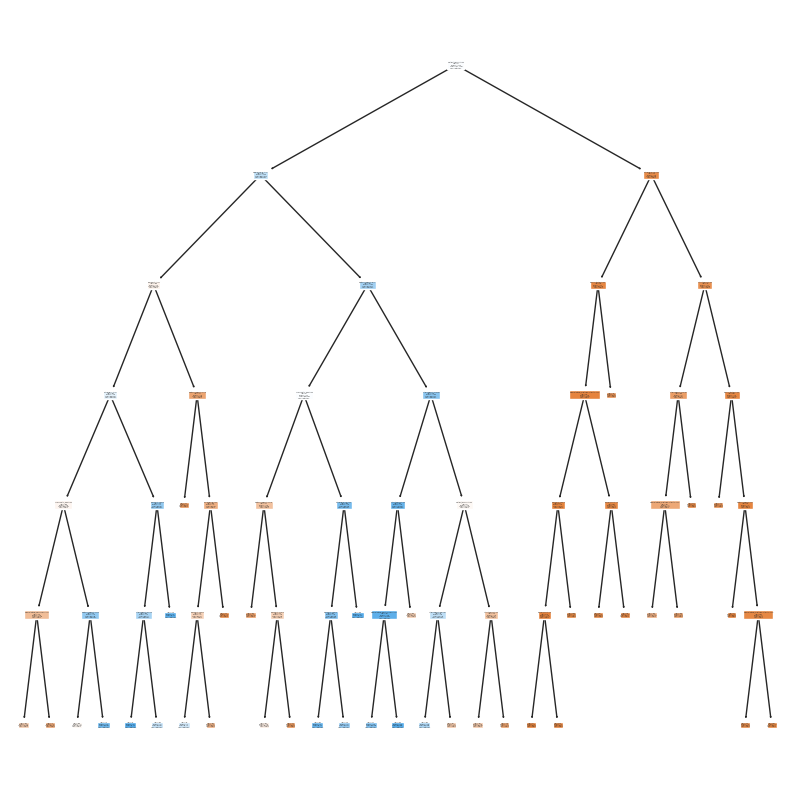

In [83]:
##Visulation of updated Decision Tree


fig = plt.figure(figsize=(10,10))
thing = tree.plot_tree(dt,
                       feature_names=feature_cols,
                       class_names=['Churn', 'Not Churn'],
                       filled=True)

In [84]:
##Checking to see the robustness of our model by making sure the disparity between train and test isn't too large

print(f'Score on training set: {dt.score(X_train, y_train)}')
print(f'Score on testing set: {dt.score(X_test, y_test)}')

Score on training set: 0.7744648318042814
Score on testing set: 0.7299465240641712


In [85]:
#generate predictions for Xtrain with 3 additional columns added
train_results = X_train.copy()
train_results['y_pred'] = dt.predict(X_train)
train_results['y_real'] = y_train
train_results['y_prob'] = dt.predict_proba(X_train)[:,1]

train_results.head()

,Zip Code,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,...,Tenure Months_New,Tenure Months_Short Term,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,y_pred,y_real,y_prob
2148,94965,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0.636364
887,93545,1,1,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0.636364
2662,95651,0,1,0,1,1,0,0,1,1,...,0,0,0,1,1,0,0,0,1,0.181818
685,90640,1,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.017857
413,93505,0,1,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0.106383


In [86]:
#generate predictions for Xtest with 3 additional columns added

test_results = X_test.copy()
test_results['y_pred'] = dt.predict(X_test)
test_results['y_real'] = y_test
test_results['y_prob'] = dt.predict_proba(X_test)[:,1]

test_results.head()

,Zip Code,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,...,Tenure Months_New,Tenure Months_Short Term,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,y_pred,y_real,y_prob
1151,92626,0,1,1,1,1,0,1,1,1,...,0,0,0,1,0,0,0,0,0,0.037037
538,92657,0,1,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.017857
351,91786,0,0,0,1,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0.460000
1108,94571,1,0,0,1,0,1,1,1,0,...,1,0,0,0,1,0,0,1,0,0.803571
1662,92111,0,1,0,1,1,0,1,1,1,...,0,0,0,1,0,1,0,0,0,0.106383


In [87]:
##Calculating the importance of each feature in regards to predicting the target

dt.feature_importances_

array([2.75229515e-02, 0.00000000e+00, 0.00000000e+00, 4.37007197e-02,
       0.00000000e+00, 0.00000000e+00, 4.02017105e-02, 0.00000000e+00,
       8.93673961e-03, 1.28434021e-03, 0.00000000e+00, 1.95235063e-02,
       3.92228430e-03, 6.25968392e-02, 7.90507475e-02, 1.20628518e-01,
       3.69992939e-05, 0.00000000e+00, 0.00000000e+00, 1.27752253e-01,
       0.00000000e+00, 2.33630964e-02, 4.24246087e-01, 5.96770259e-04,
       1.22912124e-02, 4.34522417e-03])

In [88]:
##Zip together with feature names
importance = list(zip(feature_cols, list(dt.feature_importances_)))

In [89]:
importance

[('Zip Code', 0.027522951464404775),
 ('Senior Citizen', 0.0),
 ('Partner', 0.0),
 ('Dependents', 0.043700719731924395),
 ('Phone Service', 0.0),
 ('Multiple Lines', 0.0),
 ('Internet Service', 0.04020171053555379),
 ('Online Security', 0.0),
 ('Online Backup', 0.008936739605756739),
 ('Device Protection', 0.001284340206093539),
 ('Tech Support', 0.0),
 ('Streaming TV', 0.01952350630869058),
 ('Streaming Movies', 0.003922284300319761),
 ('Paperless Billing', 0.06259683918645127),
 ('Monthly Charges', 0.07905074746877451),
 ('Total Charges', 0.12062851798700691),
 ('Gender_Male', 3.699929386886661e-05),
 ('Tenure Months_Loyal', 0.0),
 ('Tenure Months_Medium Term', 0.0),
 ('Tenure Months_New', 0.1277522533364976),
 ('Tenure Months_Short Term', 0.0),
 ('Contract_One year', 0.02336309641006799),
 ('Contract_Two year', 0.42424608729272467),
 ('Payment Method_Credit card (automatic)', 0.000596770258554635),
 ('Payment Method_Electronic check', 0.012291212448046674),
 ('Payment Method_Mailed 

In [90]:
##Using APR function to create output of performance metrics

train_scores = apr(train_results['y_pred'], train_results['y_real'])

Accuracy: 0.7744648318042814
Precision: 0.7842227378190255
Recall: 0.7652830188679245
F1: 0.774637127578304


In [91]:
##Using APR function to create output of performance metrics

test_scores = apr(test_results['y_pred'], test_results['y_real'])

Accuracy: 0.7299465240641712
Precision: 0.7219152854511971
Recall: 0.7205882352941176
F1: 0.7212511499540019


Training Confusion Matrix:


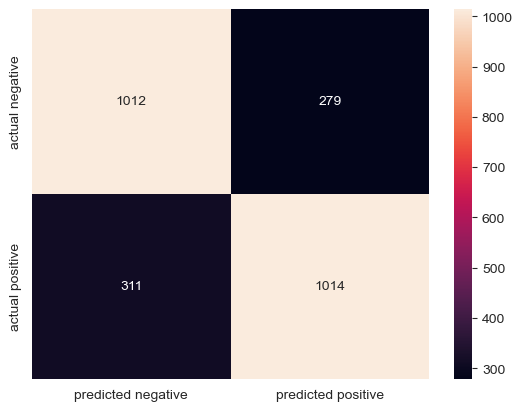

In [92]:
print('Training Confusion Matrix:')
cm = metrics.confusion_matrix(train_results['y_real'], train_results['y_pred']) # Create confusion matrix
conf_matrix(cm) # Plot confusion matrix

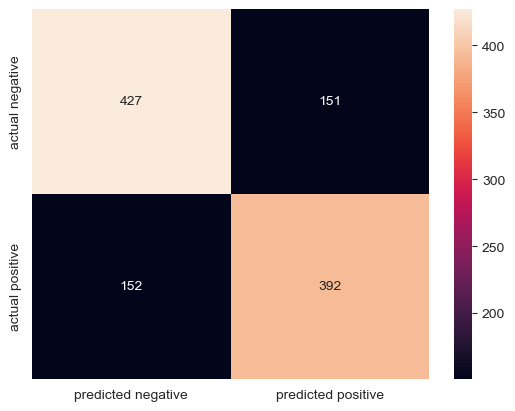

In [93]:
cm = metrics.confusion_matrix(test_results['y_real'], test_results['y_pred']) # Create confusion matrix
conf_matrix(cm) # Plot confusion matrix

# Most Likely to Churn Customers

In [94]:
# Get dataframe of non-churned customers
df_0 = df.loc[df['Churn Value'] == 0]

In [95]:
df_0_lr_fe = lr_feature_eng(df_0) # Feature Engineer
df_0_lr_fe['lr_prob'] = log_reg_final.predict(df_0_lr_fe[final_columns]) # Get probabilities
df_0_lr_fe

,const,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,...,Tenure Months_Loyal,Tenure Months_Medium Term,Tenure Months_New,Tenure Months_Short Term,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,lr_prob
1869,1.0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0.888010
1870,1.0,0,0,0,1,0,1,1,0,1,...,0,0,0,0,1,0,0,0,1,0.141617
1871,1.0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,0,0.111298
1872,1.0,0,0,1,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0.152283
1873,1.0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0.471006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0.018938
7028,1.0,0,1,1,1,1,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0.061045
7029,1.0,0,1,1,1,1,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0.095504
7030,1.0,0,1,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,0.327589


In [96]:
df_0_dt_fe = dt_feature_eng(df_0) # Feature Engineer
df_0_dt_fe[['dt_prob0','dt_prob1']] = dt.predict_proba(df_0_dt_fe[feature_cols]) # Get probabilities
df_0_dt_fe

,City,Zip Code,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tenure Months_Medium Term,Tenure Months_New,Tenure Months_Short Term,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,dt_prob0,dt_prob1
1869,Los Angeles,90001,0,1,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0.170213,0.829787
1870,Los Angeles,90002,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0.782609,0.217391
1871,Los Angeles,90004,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0.633540,0.366460
1872,Los Angeles,90007,0,0,1,1,1,0,0,1,...,1,0,0,0,0,1,0,0,0.252294,0.747706
1873,Los Angeles,90008,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0.782609,0.217391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Landers,92285,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1.000000,0.000000
7028,Adelanto,92301,0,1,1,1,1,1,1,0,...,1,0,0,1,0,0,0,1,0.625000,0.375000
7029,Amboy,92304,0,1,1,1,1,0,0,1,...,0,0,0,1,0,1,0,0,0.640000,0.360000
7030,Angelus Oaks,92305,0,1,1,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0.821429,0.178571


In [97]:
probability_df = df_0_lr_fe['lr_prob'] # Create Series of lr_probabilities
probability_df = probability_df.to_frame() # Convert to dataframe
probability_df['dt_prob'] = df_0_dt_fe['dt_prob1'] # Insert dt_probabilities
probability_df

,lr_prob,dt_prob
1869,0.888010,0.829787
1870,0.141617,0.217391
1871,0.111298,0.366460
1872,0.152283,0.747706
1873,0.471006,0.217391
...,...,...
7027,0.018938,0.000000
7028,0.061045,0.375000
7029,0.095504,0.360000
7030,0.327589,0.178571


In [98]:
probability_df.corr() # Get correlation of the probabilities from both models

,lr_prob,dt_prob
lr_prob,1.000000,0.788733
dt_prob,0.788733,1.000000


The 2 models used have high correlation, showing that probabilities produced are robust

In [99]:
# Get the average of the 2 probabilities
probability_df['avg_prob'] = (probability_df['dt_prob']+ probability_df['lr_prob'])/2

# Get root mean squared of the 2 probabilities
probability_df['root_mean_squared_prob'] = np.sqrt((probability_df['dt_prob']**2+ probability_df['lr_prob']**2)/2)
probability_df


,lr_prob,dt_prob,avg_prob,root_mean_squared_prob
1869,0.888010,0.829787,0.858898,0.859392
1870,0.141617,0.217391,0.179504,0.183459
1871,0.111298,0.366460,0.238879,0.270814
1872,0.152283,0.747706,0.449995,0.539562
1873,0.471006,0.217391,0.344199,0.366814
...,...,...,...,...
7027,0.018938,0.000000,0.009469,0.013391
7028,0.061045,0.375000,0.218022,0.268655
7029,0.095504,0.360000,0.227752,0.263364
7030,0.327589,0.178571,0.253080,0.263820


We based our top 500 most likely to churn customers on the root mean squared as this punishes low values and favours higher probabilities coming from either model

In [100]:
# Sort by root_mean_squared_prob and get first 500 rows
top_500 = probability_df.sort_values(by='root_mean_squared_prob', ascending = False).head(500)
top_500

,lr_prob,dt_prob,avg_prob,root_mean_squared_prob
3136,0.966769,0.900000,0.933384,0.933981
3707,0.966769,0.890295,0.928532,0.929319
6251,0.963380,0.890295,0.926838,0.927558
4193,0.948085,0.890295,0.919190,0.919644
4335,0.948085,0.890295,0.919190,0.919644
...,...,...,...,...
4244,0.790729,0.693182,0.741955,0.743557
6889,0.641193,0.829787,0.735490,0.741510
3774,0.553733,0.890295,0.722014,0.741366
4438,0.833238,0.636364,0.734801,0.741365


In [101]:
top_500_index = list(top_500.index) # Create index list

In [102]:
customer_ids = project_df[['CustomerID']] # Create dataframe of all customer ids

In [103]:
# Get IDs of top 500 using heir index
top_500_id = customer_ids.loc[customer_ids.index[top_500_index]]
top_500_id

,CustomerID
3136,7279-NMVJC
3707,1174-FGIFN
6251,6859-RKMZJ
4193,9909-DFRJA
4335,0840-DFEZH
...,...
4244,3481-JHUZH
6889,7976-CICYS
3774,5186-PEIZU
4438,7801-KICAO


In [104]:
top_500['Customer_ID'] = top_500_id # Add Customer_ID to top 500 dataframe

In [105]:
top_500

,lr_prob,dt_prob,avg_prob,root_mean_squared_prob,Customer_ID
3136,0.966769,0.900000,0.933384,0.933981,7279-NMVJC
3707,0.966769,0.890295,0.928532,0.929319,1174-FGIFN
6251,0.963380,0.890295,0.926838,0.927558,6859-RKMZJ
4193,0.948085,0.890295,0.919190,0.919644,9909-DFRJA
4335,0.948085,0.890295,0.919190,0.919644,0840-DFEZH
...,...,...,...,...,...
4244,0.790729,0.693182,0.741955,0.743557,3481-JHUZH
6889,0.641193,0.829787,0.735490,0.741510,7976-CICYS
3774,0.553733,0.890295,0.722014,0.741366,5186-PEIZU
4438,0.833238,0.636364,0.734801,0.741365,7801-KICAO


In [106]:
# Create final top_500 table
top_500['Rank'] = np.arange(len(top_500))+1 # Add rank column
top_500.rename(columns={'avg_prob':'Churn_Probability'}, inplace=True)
top_500_table = top_500[['Rank', 'Customer_ID', 'Churn_Probability']]
top_500_table.reset_index(inplace=True, drop=True) # Get rid of index
top_500_table

,Rank,Customer_ID,Churn_Probability
0,1,7279-NMVJC,0.933384
1,2,1174-FGIFN,0.928532
2,3,6859-RKMZJ,0.926838
3,4,9909-DFRJA,0.919190
4,5,0840-DFEZH,0.919190
...,...,...,...
495,496,3481-JHUZH,0.741955
496,497,7976-CICYS,0.735490
497,498,5186-PEIZU,0.722014
498,499,7801-KICAO,0.734801


In [107]:
top_500_table.to_csv('Churn_Probability_Top_500.csv') # Save table as .csv

Do the same for rest of the customers:

In [108]:
probability_df

,lr_prob,dt_prob,avg_prob,root_mean_squared_prob
1869,0.888010,0.829787,0.858898,0.859392
1870,0.141617,0.217391,0.179504,0.183459
1871,0.111298,0.366460,0.238879,0.270814
1872,0.152283,0.747706,0.449995,0.539562
1873,0.471006,0.217391,0.344199,0.366814
...,...,...,...,...
7027,0.018938,0.000000,0.009469,0.013391
7028,0.061045,0.375000,0.218022,0.268655
7029,0.095504,0.360000,0.227752,0.263364
7030,0.327589,0.178571,0.253080,0.263820


In [110]:
probability_df_index = list(probability_df.index)
probability_df_id = customer_ids.loc[customer_ids.index[probability_df_index]]
probability_df_id

,CustomerID
1869,7590-VHVEG
1870,5575-GNVDE
1871,7795-CFOCW
1872,1452-KIOVK
1873,6713-OKOMC
...,...
7027,1035-IPQPU
7028,7398-LXGYX
7029,2823-LKABH
7030,0550-DCXLH


In [111]:
probability_df['Customer_ID'] = probability_df_id['CustomerID']
probability_df

,lr_prob,dt_prob,avg_prob,root_mean_squared_prob,Customer_ID
1869,0.888010,0.829787,0.858898,0.859392,7590-VHVEG
1870,0.141617,0.217391,0.179504,0.183459,5575-GNVDE
1871,0.111298,0.366460,0.238879,0.270814,7795-CFOCW
1872,0.152283,0.747706,0.449995,0.539562,1452-KIOVK
1873,0.471006,0.217391,0.344199,0.366814,6713-OKOMC
...,...,...,...,...,...
7027,0.018938,0.000000,0.009469,0.013391,1035-IPQPU
7028,0.061045,0.375000,0.218022,0.268655,7398-LXGYX
7029,0.095504,0.360000,0.227752,0.263364,2823-LKABH
7030,0.327589,0.178571,0.253080,0.263820,0550-DCXLH


In [113]:
probability_df.rename(columns={'avg_prob':'Churn_Probability'}, inplace=True)
probability_df_table = probability_df[['Customer_ID', 'Churn_Probability']]
probability_df_table.reset_index(inplace=True, drop=True)
probability_df_table

,Customer_ID,Churn_Probability
0,7590-VHVEG,0.858898
1,5575-GNVDE,0.179504
2,7795-CFOCW,0.238879
3,1452-KIOVK,0.449995
4,6713-OKOMC,0.344199
...,...,...
5158,1035-IPQPU,0.009469
5159,7398-LXGYX,0.218022
5160,2823-LKABH,0.227752
5161,0550-DCXLH,0.253080


In [114]:
probability_df_table.to_csv('Churn_Probability_Remaining.csv')